<a href="https://colab.research.google.com/github/UmarKhattab09/Recommendation_System/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Recommendation is using Coleration Function, It takes a movie, and recommend you other movies based on other users rating.


In [106]:
import numpy as pd
import pandas as pd

In [107]:
column_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("u.data",sep="\t",names=column_names)

In [108]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [109]:
df["user_id"].value_counts(ascending=True).head(20)

,count
user_id,
888,20
866,20
242,20
166,20
558,20
873,20
572,20
475,20
596,20


In [110]:
# movie id | movie title | release date | video release date |
# IMDb URL | unknown | Action | Adventure | Animation |
# Children's | Comedy | Crime | Documentary | Drama | Fantasy |
# Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
# Thriller | War | Western |
names = ["movie_id","movie_title","release_date","video_release_date","IMDB_URL","Unknown","Action","Adventure","Animation","Children's",
         "Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","SciFi","Thriller","War","Western"]
df2 = pd.read_csv("u.item",sep="|",encoding="ISO-8859-1",names =names)
df2.head()

,movie_id,movie_title,release_date,video_release_date,IMDB_URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
movie_title= df2[["movie_id","movie_title"]]
movie_title.rename(columns={"movie_id":"item_id"},inplace=True)
movie_title.head()

/tmp/ipython-input-2007401347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_title.rename(columns={"movie_id":"item_id"},inplace=True)


,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [112]:
#Merging
df = pd.merge(df,movie_title,on="item_id")
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [113]:
ratings = df.groupby("movie_title")["rating"].mean().reset_index()
ratings.head()

,movie_title,rating
0,'Til There Was You (1997),2.333333
1,1-900 (1994),2.600000
2,101 Dalmatians (1996),2.908257
3,12 Angry Men (1957),4.344000
4,187 (1997),3.024390


In [114]:
ratings["rating_count"] = df.groupby("movie_title")["rating"].count().reset_index()["rating"]
ratings.head()

,movie_title,rating,rating_count
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


In [115]:
ratings.sort_values("rating",ascending=False,inplace=True)


In [116]:
ratings.dtypes

,0
movie_title,object
rating,float64
rating_count,int64


/tmp/ipython-input-1440564056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratings["rating"].head(10), y=ratings["movie_title"].head(10), data=ratings, palette="deep")


Text(0, 0.5, 'Movie Title')

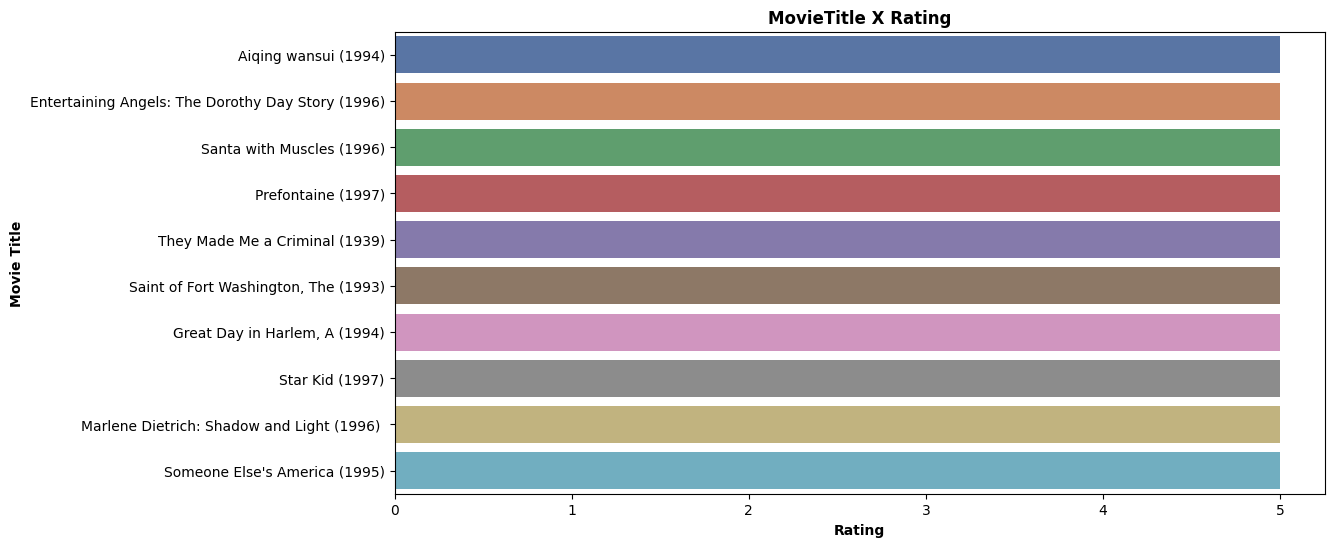

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,6))

ax = sns.barplot(x=ratings["rating"].head(10), y=ratings["movie_title"].head(10), data=ratings, palette="deep")

# plt.xlim(4,10)
plt.title("MovieTitle X Rating", weight="bold")

plt.xlabel("Rating", weight="bold")
plt.ylabel("Movie Title", weight="bold")

/tmp/ipython-input-3441779035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratings["rating_count"].head(10), y=ratings["movie_title"].head(10), data=ratings, palette="deep")


Text(0, 0.5, 'Movie Title')

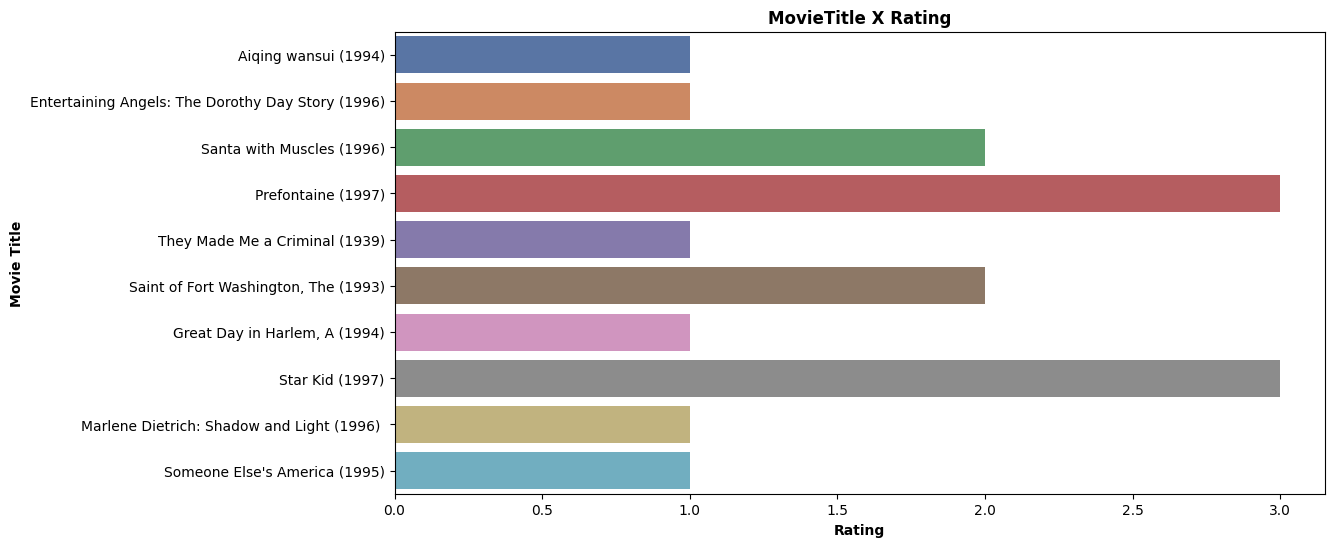

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,6))

ax = sns.barplot(x=ratings["rating_count"].head(10), y=ratings["movie_title"].head(10), data=ratings, palette="deep")

# plt.xlim(4,10)
plt.title("MovieTitle X Rating", weight="bold")

plt.xlabel("Rating", weight="bold")
plt.ylabel("Movie Title", weight="bold")

### Recommending Similar Movies

In [119]:
moviematrix = df.pivot_table(index="user_id",columns="movie_title",values="rating")
moviematrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [120]:
StarWar_Ratings = moviematrix["Star Wars (1977)"]
# StarWar_Ratings.head()
LiarLiar_Rating= moviematrix["Liar Liar (1997)"]

##Corleation
Similar_to_StarWar = moviematrix.corrwith(StarWar_Ratings)
Similar_to_LiarLiar = moviematrix.corrwith(LiarLiar_Rating)

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [121]:
corr_StarWar = pd.DataFrame(Similar_to_StarWar,columns=["Correlation"])
corr_StarWar.dropna(inplace=True)
corr_StarWar.sort_values("Correlation",ascending=False,inplace=True)
corr_StarWar.head()

,Correlation
movie_title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
No Escape (1994),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0


In [122]:
corr_LiarLiar = pd.DataFrame(Similar_to_LiarLiar,columns=["Correlation"])
corr_LiarLiar.dropna(inplace=True)
corr_LiarLiar.head()

,Correlation
movie_title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


##### BASED ON COUNT , LESS THAN 100 REVIEWS WILL BE REMOVED FROM RECOMMENDATION

In [123]:
FinalCorr_StarWar = pd.merge(corr_StarWar,ratings,on="movie_title")
FinalCorr_StarWar.head()

,movie_title,Correlation,rating,rating_count
0,Hollow Reed (1996),1.0,2.333333,6
1,Stripes (1981),1.0,3.800000,5
2,No Escape (1994),1.0,2.400000,5
3,Man of the Year (1995),1.0,3.111111,9
4,Cosi (1996),1.0,4.000000,4


In [124]:
FinalCorr_StarWar[FinalCorr_StarWar["rating_count"]>100].sort_values("Correlation",ascending=False).head()


,movie_title,Correlation,rating,rating_count
11,Star Wars (1977),1.000000,4.358491,583
42,"Empire Strikes Back, The (1980)",0.747981,4.204360,367
47,Return of the Jedi (1983),0.672556,4.007890,507
67,Raiders of the Lost Ark (1981),0.536117,4.252381,420
119,Austin Powers: International Man of Mystery (1...,0.377433,3.246154,130
